In [5]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#
#
#
# This file is part of Mapnik (c++ mapping toolkit)
# Copyright (C) 2005 Jean-Francois Doyon
#
from __future__ import print_function
import sys
from os import path
import mapnik

# Instanciate a map, giving it a width and height. Remember: the word "map" is
#  reserved in Python! :)

#root = path.dirname(__file__)
root = '/home/user/jupyter/ol14_ipynb_misc/mapanik-py/'

m = mapnik.Map(800,600,"+proj=merc +a=6378137 +b=6378137 +lat_ts=0.0 +lon_0=0.0 +x_0=0.0 +y_0=0 +k=1.0 +units=m +nadgrids=@null +no_defs")

# Set its background colour. More on colours later ...

m.background = mapnik.Color('white')

# Now we can start adding layers, in stacking order (i.e. bottom layer first)

# Canadian Provinces (Polygons)

# Instanciate a layer.  The parameters depend on the type of data:
# shape:
#     type='shape'
#     file='/path/to/shape'
# raster:
#     type='raster'
#     file='/path/to/raster'
# postgis:
#     type='postgis'
#     host='127.0.0.1'
#     dbname='mydatabase'
#     user='myusername'
#     password='mypassword'
#     table= TODO

provpoly_lyr = mapnik.Layer('Provinces')
provpoly_lyr.srs = "+proj=lcc +ellps=GRS80 +lat_0=49 +lon_0=-95 +lat+1=49 +lat_2=77 +datum=NAD83 +units=m +no_defs"
provpoly_lyr.datasource = mapnik.Shapefile(file=path.join(root,'../data/boundaries'), encoding='latin1')

# We then define a style for the layer.  A layer can have one or many styles.
# Styles are named, so they can be shared across different layers.
# Multiple styles per layer behaves functionally like multiple layers.  The
# data is completely re-scanned for each style within one layer, and a style
# will be drawn entirely "above" the previous one.  Performance wise using
# multiple styles in one layer is the same has having multiple layers.
# The paradigm is useful mostly as a convenience.

provpoly_style = mapnik.Style()

# A Style needs one or more rules.  A rule will normally consist of a filter
# for feature selection, and one or more symbolizers.

provpoly_rule_on = mapnik.Rule()

# A Expression() allows the selection of features to which the symbology will
# be applied.  More on Mapnik expressions can be found in Tutorial #2.
# A given feature can only match one filter per rule per style.

provpoly_rule_on.filter = mapnik.Expression("[NAME_EN] = 'Ontario'")

# Here a symbolizer is defined.  Available are:
#     - LineSymbolizer(Color(),<width>)
#     - LineSymbolizer(Stroke())
#     - PolygonSymbolizer(Color())
#     - PointSymbolizer(<file>,<type>,<width>,<height>)

# Some of them can accept a Color() instance, which can be created with:
#     - Color(<red>, <green>, <blue>)
#     - Color(<red>, <green>, <blue>, <alpha>)
#     - Color(<string>) where <string> will be something like '#00FF00'
#       or '#0f0' or 'green'

sym = mapnik.PolygonSymbolizer()
sym.fill = mapnik.Color(250, 190, 183);
provpoly_rule_on.symbols.append(sym)
provpoly_style.rules.append(provpoly_rule_on)

provpoly_rule_qc = mapnik.Rule()
provpoly_rule_qc.filter = mapnik.Expression("[NOM_FR] = 'Québec'")
sym = mapnik.PolygonSymbolizer()
sym.fill = mapnik.Color(217, 235, 203)
provpoly_rule_qc.symbols.append(sym)
provpoly_style.rules.append(provpoly_rule_qc)

# Add the style to the map, giving it a name.  This is the name that will be
# used to refer to it from here on.  Having named styles allows them to be
# re-used throughout the map.

m.append_style('provinces', provpoly_style)

# Then associate the style to the layer itself.

provpoly_lyr.styles.append('provinces')

# Then add the layer to the map.  In reality, it's the order in which you
# append them to the map that will determine the drawing order, though by
# convention it is recommended to define them in drawing order as well.

m.layers.append(provpoly_lyr)

# Drainage

# A simple example ...

qcdrain_lyr = mapnik.Layer('Quebec Hydrography')
qcdrain_lyr.srs = "+proj=lcc +ellps=GRS80 +lat_0=49 +lon_0=-95 +lat+1=49 +lat_2=77 +datum=NAD83 +units=m +no_defs"
qcdrain_lyr.datasource = mapnik.Shapefile(file=path.join(root,'../data/qcdrainage'))

qcdrain_style = mapnik.Style()
qcdrain_rule = mapnik.Rule()
qcdrain_rule.filter = mapnik.Expression('[HYC] = 8')
sym = mapnik.PolygonSymbolizer()
sym.fill = mapnik.Color(153, 204, 255)
sym.smooth = 1.0 # very smooth
qcdrain_rule.symbols.append(sym)
qcdrain_style.rules.append(qcdrain_rule)

m.append_style('drainage', qcdrain_style)
qcdrain_lyr.styles.append('drainage')
m.layers.append(qcdrain_lyr)

# In this case, we have 2 data sets with similar schemas (same filtering
# attributes, and same desired style), so we're going to
# re-use the style defined in the above layer for the next one.

ondrain_lyr = mapnik.Layer('Ontario Hydrography')
ondrain_lyr.srs = "+proj=lcc +ellps=GRS80 +lat_0=49 +lon_0=-95 +lat+1=49 +lat_2=77 +datum=NAD83 +units=m +no_defs"
ondrain_lyr.datasource = mapnik.Shapefile(file=path.join(root,'../data/ontdrainage'))

ondrain_lyr.styles.append('drainage')
m.layers.append(ondrain_lyr)

# Provincial boundaries

provlines_lyr = mapnik.Layer('Provincial borders')
provlines_lyr.srs = "+proj=lcc +ellps=GRS80 +lat_0=49 +lon_0=-95 +lat+1=49 +lat_2=77 +datum=NAD83 +units=m +no_defs"
provlines_lyr.datasource = mapnik.Shapefile(file=path.join(root,'../data/boundaries_l'))

# Here we define a "dash dot dot dash" pattern for the provincial boundaries.

provlines_style = mapnik.Style()
provlines_rule = mapnik.Rule()
sym = mapnik.LineSymbolizer()
# FIXME - currently adding dash arrays is broken
# https://github.com/mapnik/mapnik/issues/2324
sym.stroke = mapnik.Color('black')
sym.stroke_width = 1
provlines_rule.symbols.append(sym)
provlines_style.rules.append(provlines_rule)

m.append_style('provlines', provlines_style)
provlines_lyr.styles.append('provlines')
m.layers.append(provlines_lyr)

# Roads 3 and 4 (The "grey" roads)

roads34_lyr = mapnik.Layer('Roads')
roads34_lyr.srs = "+proj=lcc +ellps=GRS80 +lat_0=49 +lon_0=-95 +lat+1=49 +lat_2=77 +datum=NAD83 +units=m +no_defs"
# create roads datasource (we're going to re-use it later)

roads34_lyr.datasource = mapnik.Shapefile(file=path.join(root,'../data/roads'))

roads34_style = mapnik.Style()
roads34_rule = mapnik.Rule()
roads34_rule.filter = mapnik.Expression('([CLASS] = 3) or ([CLASS] = 4)')

# With lines of a certain width, you can control how the ends
# are closed off using line_cap as below.

# Available options are:
# line_cap: BUTT_CAP, SQUARE_CAP, ROUND_CAP
# line_join: MITER_JOIN, MITER_REVERT_JOIN, ROUND_JOIN, BEVEL_JOIN

# And one last Stroke() attribute not used here is "opacity", which
# can be set to a numerical value.

sym = mapnik.LineSymbolizer()
sym.stroke = mapnik.Color(171,158,137)
sym.stroke_width = 2
sym.stroke_linecap = mapnik.stroke_linecap.ROUND_CAP

roads34_rule.symbols.append(sym)
roads34_style.rules.append(roads34_rule)

m.append_style('smallroads', roads34_style)
roads34_lyr.styles.append('smallroads')
m.layers.append(roads34_lyr)

# Roads 2 (The thin yellow ones)

roads2_lyr = mapnik.Layer('Roads')
roads2_lyr.srs = "+proj=lcc +ellps=GRS80 +lat_0=49 +lon_0=-95 +lat+1=49 +lat_2=77 +datum=NAD83 +units=m +no_defs"
# Just get a copy from roads34_lyr
roads2_lyr.datasource = roads34_lyr.datasource

roads2_style_1 = mapnik.Style()
roads2_rule_1 = mapnik.Rule()
roads2_rule_1.filter = mapnik.Expression('[CLASS] = 2')

sym = mapnik.LineSymbolizer()
sym.stroke = mapnik.Color(171,158,137)
sym.stroke_width = 4
sym.stroke_linecap = mapnik.stroke_linecap.ROUND_CAP
roads2_rule_1.symbols.append(sym)
roads2_style_1.rules.append(roads2_rule_1)

m.append_style('road-border', roads2_style_1)

roads2_style_2 = mapnik.Style()
roads2_rule_2 = mapnik.Rule()
roads2_rule_2.filter = mapnik.Expression('[CLASS] = 2')
sym = mapnik.LineSymbolizer()
sym.stroke = mapnik.Color(255,250,115)
sym.stroke_linecap = mapnik.stroke_linecap.ROUND_CAP
sym.stroke_width = 2
roads2_rule_2.symbols.append(sym)
roads2_style_2.rules.append(roads2_rule_2)

m.append_style('road-fill', roads2_style_2)

roads2_lyr.styles.append('road-border')
roads2_lyr.styles.append('road-fill')

m.layers.append(roads2_lyr)

# Roads 1 (The big orange ones, the highways)

roads1_lyr = mapnik.Layer('Roads')
roads1_lyr.srs = "+proj=lcc +ellps=GRS80 +lat_0=49 +lon_0=-95 +lat+1=49 +lat_2=77 +datum=NAD83 +units=m +no_defs"
roads1_lyr.datasource = roads34_lyr.datasource

roads1_style_1 = mapnik.Style()
roads1_rule_1 = mapnik.Rule()
roads1_rule_1.filter = mapnik.Expression('[CLASS] = 1')
sym = mapnik.LineSymbolizer()
sym.stroke = mapnik.Color(188,149,28)
sym.stroke_linecap = mapnik.stroke_linecap.ROUND_CAP
sym.stroke_width = 7
roads1_rule_1.symbols.append(sym)
roads1_style_1.rules.append(roads1_rule_1)
m.append_style('highway-border', roads1_style_1)

roads1_style_2 = mapnik.Style()
roads1_rule_2 = mapnik.Rule()
roads1_rule_2.filter = mapnik.Expression('[CLASS] = 1')
sym.stroke = mapnik.Color(242,191,36)
sym.stroke_linecap = mapnik.stroke_linecap.ROUND_CAP
sym.stroke_width = 5
roads1_rule_2.symbols.append(sym)
roads1_style_2.rules.append(roads1_rule_2)

m.append_style('highway-fill', roads1_style_2)

roads1_lyr.styles.append('highway-border')
roads1_lyr.styles.append('highway-fill')

m.layers.append(roads1_lyr)

# Populated Places

popplaces_lyr = mapnik.Layer('Populated Places')
popplaces_lyr.srs = "+proj=lcc +ellps=GRS80 +lat_0=49 +lon_0=-95 +lat+1=49 +lat_2=77 +datum=NAD83 +units=m +no_defs"
popplaces_lyr.datasource = mapnik.Shapefile(file=path.join(root,'../data/popplaces'),encoding='latin1')

popplaces_style = mapnik.Style()
popplaces_rule = mapnik.Rule()

# And here we have a TextSymbolizer, used for labeling.
# The first parameter is the name of the attribute to use as the source of the
# text to label with.  Then there is font size in points (I think?), and colour.

# TODO - currently broken: https://github.com/mapnik/mapnik/issues/2324
#popplaces_text_symbolizer = mapnik.TextSymbolizer(mapnik.Expression("[GEONAME]"),
#                                           'DejaVu Sans Book',
#                                           10, mapnik.Color('black'))

# We set a "halo" around the text, which looks like an outline if thin enough,
# or an outright background if large enough.
#popplaces_text_symbolizer.label_placement= mapnik.label_placement.POINT_PLACEMENT
#popplaces_text_symbolizer.halo_fill = mapnik.Color(255,255,200)
#popplaces_text_symbolizer.halo_radius = 1
#popplaces_text_symbolizer.avoid_edges = True
#popplaces_text_symbolizer.minimum_padding = 30
#popplaces_rule.symbols.append(popplaces_text_symbolizer)

popplaces_style.rules.append(popplaces_rule)

m.append_style('popplaces', popplaces_style)
popplaces_lyr.styles.append('popplaces')
m.layers.append(popplaces_lyr)

# Draw map

# Set the initial extent of the map in 'master' spherical Mercator projection
m.zoom_to_box(mapnik.Box2d(-8024477.28459,5445190.38849,-7381388.20071,5662941.44855))

# Render map
im = mapnik.Image(m.width,m.height)
mapnik.render(m, im)

# Save image to files
images_ = []
if mapnik.has_png():
    im.save('demo.png', 'png') # true-colour RGBA
    images_.append('demo.png')

    # old behavior, now can do 'png8:c=256'
    im.save('demo256.png', 'png256') # save to palette based (max 256 colours) png
    images_.append('demo256.png')

    im.save('demo64_binary_transparency.png', 'png8:c=64:t=1')
    images_.append('demo64_binary_transparency.png')

    im.save('demo128_colors_hextree_no_alpha.png', 'png8:c=100:m=h:t=0')
    images_.append('demo128_colors_hextree_no_alpha.png')

if mapnik.has_jpeg():
    im.save('demo_high.jpg', 'jpeg100')
    images_.append('demo_high.jpg')

    im.save('demo_low.jpg', 'jpeg50')
    images_.append('demo_low.jpg')

if mapnik.has_tiff():
    im.save('demo.tif', 'tiff')
    images_.append('demo.tif')

if mapnik.has_webp():
    im.save('demo.webp', 'webp') # default quality is 90
    images_.append('demo.webp')

    im.save('demo_highest.webp', 'webp:quality=100')
    images_.append('demo_med.webp')

    im.save('demo_low.webp', 'webp:quality=50')
    images_.append('demo_low.webp')


# Render cairo examples
if  mapnik.has_cairo():
    mapnik.render_to_file(m,'demo.pdf')
    images_.append('demo.pdf')
    mapnik.render_to_file(m,'demo.ps')
    images_.append('demo.ps')
    mapnik.render_to_file(m,'demo.svg')
    images_.append('demo.svg')
    mapnik.render_to_file(m,'demo_cairo_rgb24.png','RGB24')
    images_.append('demo_cairo_rgb.png')
    mapnik.render_to_file(m,'demo_cairo_argb32.png','ARGB32')
    images_.append('demo_cairo_argb.png')

print ("\n\n", len(images_), "maps have been rendered in the current directory:")

for im_ in images_:
    print ("-", im_)

print ("\n\nHave a look!\n\n")

mapnik.save_map(m,"map.xml")



 15 maps have been rendered in the current directory:
- demo.png
- demo256.png
- demo64_binary_transparency.png
- demo128_colors_hextree_no_alpha.png
- demo_high.jpg
- demo_low.jpg
- demo.tif
- demo.webp
- demo_med.webp
- demo_low.webp
- demo.pdf
- demo.ps
- demo.svg
- demo_cairo_rgb.png
- demo_cairo_argb.png


Have a look!




In [8]:
!ls

demo128_colors_hextree_no_alpha.png  demo_low.jpg   demo.webp
demo256.png			     demo_low.webp  map.xml
demo64_binary_transparency.png	     demo.pdf	    README.txt
demo_cairo_argb32.png		     demo.png	    rundemo.py
demo_cairo_rgb24.png		     demo.ps	    Untitled.ipynb
demo_highest.webp		     demo.svg
demo_high.jpg			     demo.tif


In [9]:
from IPython.display import Image

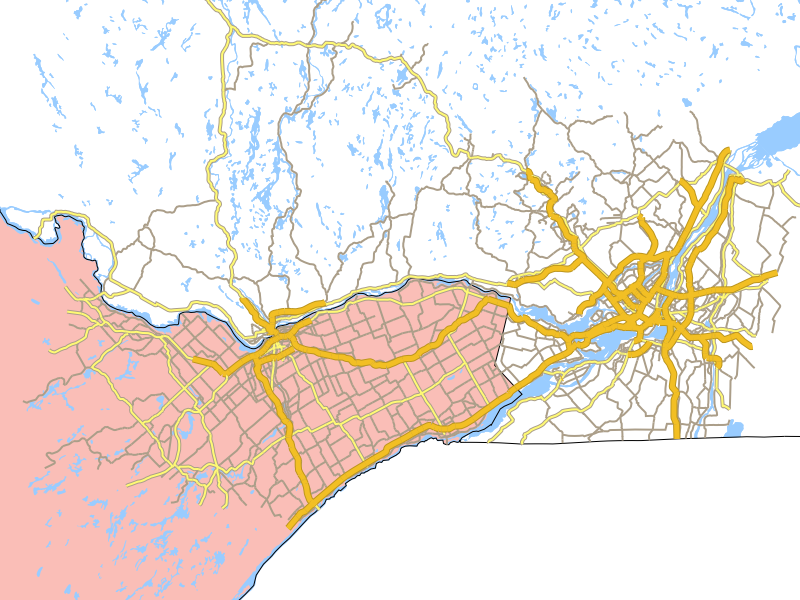

In [16]:
Image('demo.png')

In [18]:
from IPython.display import SVG

In [19]:
SVG('demo.svg')

In [7]:
mapnik.has_cairo()

True

In [6]:
%whos

Variable           Type              Data/Info
----------------------------------------------
im                 Image             <mapnik._mapnik.Image object at 0x7f5e2c2311f0>
im_                str               demo_cairo_argb.png
images_            list              n=15
m                  Map               <mapnik._mapnik.Map object at 0x7f5e2cb4a9b0>
mapnik             module            <module 'mapnik' from '/u<...>ages/mapnik/__init__.py'>
ondrain_lyr        Layer             <mapnik._mapnik.Layer object at 0x7f5e2c2317b0>
path               module            <module 'posixpath' from <...>/python3.8/posixpath.py'>
popplaces_lyr      Layer             <mapnik._mapnik.Layer object at 0x7f5e2c231fb0>
popplaces_rule     Rule              <mapnik._mapnik.Rule object at 0x7f5e2c2311b0>
popplaces_style    Style             <mapnik._mapnik.Style object at 0x7f5e2c2318b0>
print_function     _Feature          _Feature((2, 6, 0, 'alpha<...> 0, 'alpha', 0), 1048576)
provlines_lyr      La